# Importing Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dataset

In [26]:
data = pd.read_csv("Car_Purchasing_Data.csv",encoding='latin1')
print(data.shape)
data.head()

(500, 9)


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [27]:
data.drop(['Customer Name','Customer e-mail','Country'],axis=1,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               500 non-null    int64  
 1   Age                  500 non-null    float64
 2   Annual Salary        500 non-null    float64
 3   Credit Card Debt     500 non-null    float64
 4   Net Worth            500 non-null    float64
 5   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


# Missing Values

In [29]:
data.isna().sum()

Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

# Correlation in Data

In [30]:
data.corr(method='kendall')

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.056822,-0.030455,0.008981,-0.015097,-0.063210
Age,-0.056822,1.000000,-0.000754,0.016032,0.007663,0.439952
Annual Salary,-0.030455,-0.000754,1.000000,0.016802,0.009106,0.415776
Credit Card Debt,0.008981,0.016032,0.016802,1.000000,-0.030413,0.017299
Net Worth,-0.015097,0.007663,0.009106,-0.030413,1.000000,0.322517
Car Purchase Amount,-0.063210,0.439952,0.415776,0.017299,0.322517,1.000000


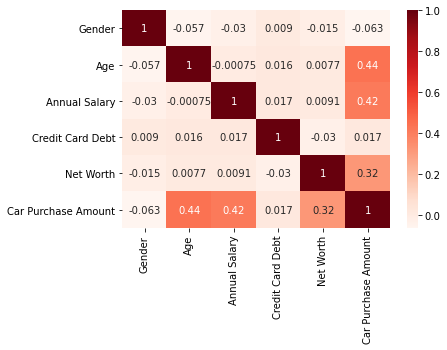

In [31]:
sns.heatmap(data.corr(method='kendall'),annot=True,cmap='Reds')

In [32]:
data.drop(['Gender'],axis=1,inplace=True)

In [33]:
data.head()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Data Standardization

In [22]:
y_mean = data['Car Purchase Amount'].mean()
y_std = data['Car Purchase Amount'].std()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)
data=scaler.transform(data)
data=pd.DataFrame(data,columns=['Age','Annual Salary','Credit Card Debt','Net Worth','Car Purchase Amount'])
data.head()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,-0.550749,0.058576,0.574271,-1.110469,-0.825870
1,-0.673834,0.386570,-0.009951,0.573929,0.084157
2,-0.387508,-0.712361,0.445452,1.193976,-0.119313
3,1.509206,1.474794,1.382369,0.675595,2.156820
4,1.389066,-0.205111,-1.218962,0.743113,1.087644


In [74]:
def convert_label_value(pred):
    return (pred * y_std + y_mean)

# Create Training and Test Set

In [42]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [43]:
x.head()

,Age,Annual Salary,Credit Card Debt,Net Worth
0,-0.550749,0.058576,0.574271,-1.110469
1,-0.673834,0.386570,-0.009951,0.573929
2,-0.387508,-0.712361,0.445452,1.193976
3,1.509206,1.474794,1.382369,0.675595
4,1.389066,-0.205111,-1.218962,0.743113


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, shuffle = True)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (475, 4)
y_train shape:  (475,)
X_test shape:  (25, 4)
y_test shape:  (25,)


# ML Model

In [47]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression().fit(X_train,y_train)

In [51]:
print(lr.coef_)
print(lr.intercept_)

[ 6.23282402e-01  6.10885634e-01 -3.35168664e-06  4.66871977e-01]
-1.2994878729791735e-06


# Errors for Train Data

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
predictions_train = lr.predict(X_train)

In [83]:
error = mean_absolute_error(predictions_train,y_train)
print("MAE Train : ",error)

MAE Train :  0.00010737354650627733


In [84]:
#converting to actual values
predicted_prices_train = [convert_label_value(x) for x in predictions_train]
actual_prices_train = [convert_label_value(x) for x in y_train]
error = mean_absolute_error(predicted_prices_train,actual_prices_train)
print("MAE : ",error)

MAE :  1.1567544089147428


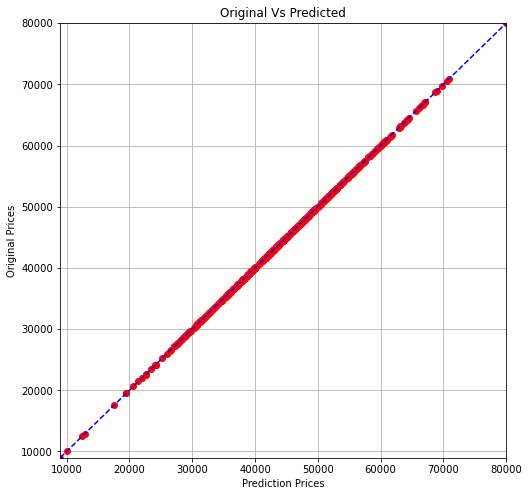

In [85]:
plt.figure(figsize=(8,8))
plt.plot(predicted_prices_train,actual_prices_train,'ro',label='Trained Model')
plt.xlabel('Prediction Prices')
plt.ylabel('Original Prices')
plt.grid()
plt.title('Original Vs Predicted')

y_min = min(min(actual_prices_train), min(predicted_prices_train))
y_max = max(max(actual_prices_train), max(predicted_prices_train))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')

Text(0, 0.5, 'Prices')

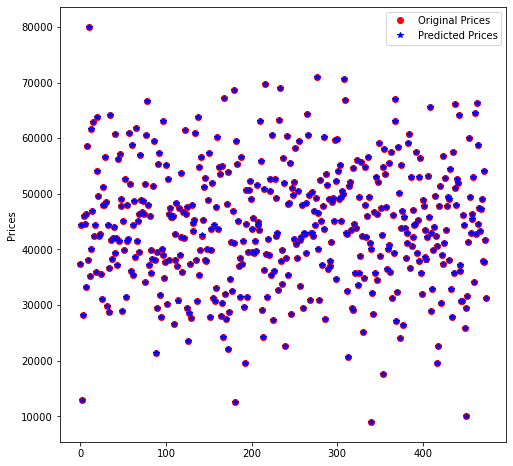

In [87]:
plt.figure(figsize=(8,8))
plt.plot(range(475),actual_prices_train,'ro',label='Original Prices')
plt.plot(range(475),predicted_prices_train,'b*',label='Predicted Prices')
plt.legend()
plt.ylabel("Prices")

# Test Data 

In [88]:
predictions = lr.predict(X_test)

In [89]:
error = mean_absolute_error(predictions,y_test)
print("MAE : ",error)

MAE :  0.00013812622614223113


# Converting Values to Actual Predictions 

In [90]:
predicted_prices = [convert_label_value(x) for x in predictions]
actual_prices = [convert_label_value(x) for x in y_test]

In [91]:
error = mean_absolute_error(predicted_prices,actual_prices)
print("MAE : ",error)

MAE :  1.4880585234967294


In [92]:
error = mean_squared_error(predicted_prices,actual_prices)
print("MSE : ",error)

MSE :  3.519869787350491


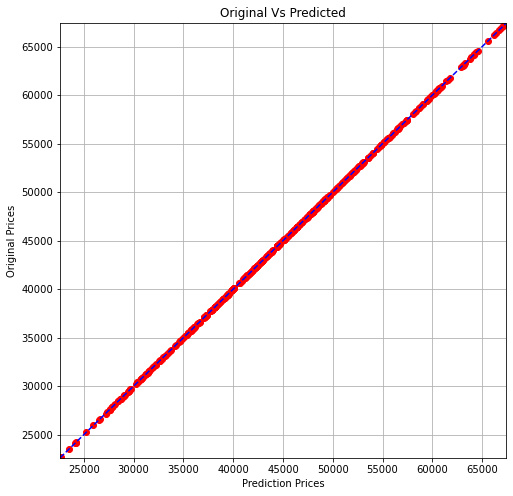

In [93]:
plt.figure(figsize=(8,8))
plt.plot(predicted_prices_train,actual_prices_train,'ro',label='Trained Model')
plt.xlabel('Prediction Prices')
plt.ylabel('Original Prices')
plt.grid()
plt.title('Original Vs Predicted')

y_min = min(min(actual_prices), min(predicted_prices))
y_max = max(max(actual_prices), max(predicted_prices))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')

Text(0, 0.5, 'Prices')

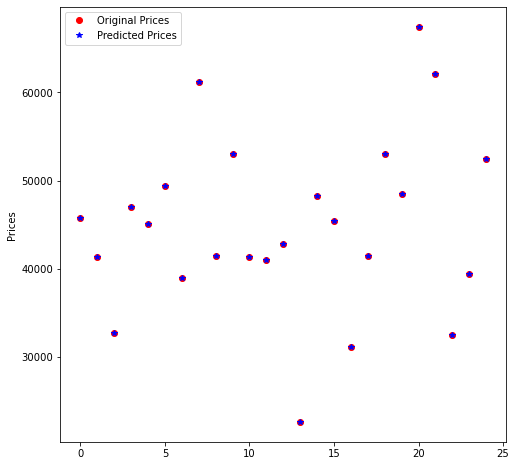

In [94]:
plt.figure(figsize=(8,8))
plt.plot(range(25),actual_prices,'ro',label='Original Prices')
plt.plot(range(25),predicted_prices,'b*',label='Predicted Prices')
plt.legend()
plt.ylabel("Prices")

# DL Model


In [101]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (4,), activation = 'relu',kernel_initializer='he_uniform'),
        Dense(20, activation = 'relu',kernel_initializer='he_uniform'),
        Dense(5, activation = 'relu',kernel_initializer='he_uniform'),
        Dense(1)        
    ])

    model.compile(
        loss='mse',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.9,epsilon=1e-07),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_33 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 6         
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [136]:

history = model.fit(
    X_train, y_train,
    epochs = 500,
    validation_split=0.05)

Train on 451 samples, validate on 24 samples
Epoch 1/500
451/451 [==============================] - 1s 3ms/sample - loss: 0.7954 - mean_absolute_error: 0.6592 - val_loss: 0.1768 - val_mean_absolute_error: 0.3528
Epoch 2/500
451/451 [==============================] - 0s 296us/sample - loss: 0.1056 - mean_absolute_error: 0.2416 - val_loss: 0.0530 - val_mean_absolute_error: 0.1765
Epoch 3/500
451/451 [==============================] - 0s 301us/sample - loss: 0.0336 - mean_absolute_error: 0.1355 - val_loss: 0.0640 - val_mean_absolute_error: 0.2036
Epoch 4/500
451/451 [==============================] - 0s 296us/sample - loss: 0.0245 - mean_absolute_error: 0.1174 - val_loss: 0.0333 - val_mean_absolute_error: 0.1301
Epoch 5/500
451/451 [==============================] - 0s 302us/sample - loss: 0.0159 - mean_absolute_error: 0.0943 - val_loss: 0.0354 - val_mean_absolute_error: 0.1332
Epoch 6/500
451/451 [==============================] - 0s 301us/sample - loss: 0.0105 - mean_absolute_error: 0.0

451/451 [==============================] - 0s 502us/sample - loss: 4.3812e-04 - mean_absolute_error: 0.0161 - val_loss: 3.0489e-04 - val_mean_absolute_error: 0.0139
Epoch 49/500
451/451 [==============================] - 0s 484us/sample - loss: 9.4136e-04 - mean_absolute_error: 0.0243 - val_loss: 0.0034 - val_mean_absolute_error: 0.0456
Epoch 50/500
451/451 [==============================] - 0s 492us/sample - loss: 0.0012 - mean_absolute_error: 0.0244 - val_loss: 5.6056e-04 - val_mean_absolute_error: 0.0194
Epoch 51/500
451/451 [==============================] - 0s 464us/sample - loss: 4.3475e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0015 - val_mean_absolute_error: 0.0283
Epoch 52/500
451/451 [==============================] - 0s 480us/sample - loss: 0.0012 - mean_absolute_error: 0.0267 - val_loss: 0.0017 - val_mean_absolute_error: 0.0251
Epoch 53/500
451/451 [==============================] - 0s 489us/sample - loss: 6.8051e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0013 - v

Epoch 95/500
451/451 [==============================] - 0s 548us/sample - loss: 7.2752e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0014 - val_mean_absolute_error: 0.0270
Epoch 96/500
451/451 [==============================] - 0s 546us/sample - loss: 7.7465e-04 - mean_absolute_error: 0.0214 - val_loss: 2.4343e-04 - val_mean_absolute_error: 0.0104
Epoch 97/500
451/451 [==============================] - 0s 555us/sample - loss: 1.0142e-04 - mean_absolute_error: 0.0076 - val_loss: 2.1562e-04 - val_mean_absolute_error: 0.0125
Epoch 98/500
451/451 [==============================] - 0s 536us/sample - loss: 2.0877e-04 - mean_absolute_error: 0.0112 - val_loss: 5.8048e-04 - val_mean_absolute_error: 0.0166
Epoch 99/500
451/451 [==============================] - 0s 551us/sample - loss: 1.7567e-04 - mean_absolute_error: 0.0093 - val_loss: 8.9578e-04 - val_mean_absolute_error: 0.0187
Epoch 100/500
451/451 [==============================] - 0s 539us/sample - loss: 4.3767e-04 - mean_absolute_error:

Epoch 141/500
451/451 [==============================] - 0s 520us/sample - loss: 1.3445e-04 - mean_absolute_error: 0.0087 - val_loss: 2.1902e-04 - val_mean_absolute_error: 0.0104
Epoch 142/500
451/451 [==============================] - 0s 290us/sample - loss: 3.2057e-04 - mean_absolute_error: 0.0137 - val_loss: 3.7559e-04 - val_mean_absolute_error: 0.0161
Epoch 143/500
451/451 [==============================] - 0s 320us/sample - loss: 6.1788e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0015 - val_mean_absolute_error: 0.0239
Epoch 144/500
451/451 [==============================] - 0s 453us/sample - loss: 8.8361e-04 - mean_absolute_error: 0.0201 - val_loss: 1.1210e-04 - val_mean_absolute_error: 0.0086
Epoch 145/500
451/451 [==============================] - 0s 606us/sample - loss: 3.2863e-04 - mean_absolute_error: 0.0141 - val_loss: 5.4685e-04 - val_mean_absolute_error: 0.0183
Epoch 146/500
451/451 [==============================] - 0s 595us/sample - loss: 4.9032e-04 - mean_absolute_e

451/451 [==============================] - 0s 548us/sample - loss: 3.2441e-04 - mean_absolute_error: 0.0127 - val_loss: 1.9086e-04 - val_mean_absolute_error: 0.0102
Epoch 187/500
451/451 [==============================] - 0s 550us/sample - loss: 2.3350e-04 - mean_absolute_error: 0.0118 - val_loss: 1.5153e-04 - val_mean_absolute_error: 0.0095
Epoch 188/500
451/451 [==============================] - 0s 551us/sample - loss: 2.1705e-04 - mean_absolute_error: 0.0113 - val_loss: 9.3400e-05 - val_mean_absolute_error: 0.0076
Epoch 189/500
451/451 [==============================] - 0s 540us/sample - loss: 1.3877e-04 - mean_absolute_error: 0.0087 - val_loss: 1.3041e-04 - val_mean_absolute_error: 0.0085
Epoch 190/500
451/451 [==============================] - 0s 542us/sample - loss: 1.3027e-04 - mean_absolute_error: 0.0088 - val_loss: 9.8095e-04 - val_mean_absolute_error: 0.0240
Epoch 191/500
451/451 [==============================] - 0s 548us/sample - loss: 8.4417e-04 - mean_absolute_error: 0.02

451/451 [==============================] - 0s 555us/sample - loss: 4.2802e-04 - mean_absolute_error: 0.0153 - val_loss: 8.3127e-05 - val_mean_absolute_error: 0.0067
Epoch 232/500
451/451 [==============================] - 0s 540us/sample - loss: 1.1463e-04 - mean_absolute_error: 0.0080 - val_loss: 1.6918e-04 - val_mean_absolute_error: 0.0102
Epoch 233/500
451/451 [==============================] - 0s 561us/sample - loss: 1.6151e-04 - mean_absolute_error: 0.0099 - val_loss: 2.3305e-04 - val_mean_absolute_error: 0.0117
Epoch 234/500
451/451 [==============================] - 0s 546us/sample - loss: 1.6117e-04 - mean_absolute_error: 0.0091 - val_loss: 5.1764e-05 - val_mean_absolute_error: 0.0055
Epoch 235/500
451/451 [==============================] - 0s 541us/sample - loss: 6.3469e-05 - mean_absolute_error: 0.0063 - val_loss: 3.3470e-04 - val_mean_absolute_error: 0.0143
Epoch 236/500
451/451 [==============================] - 0s 544us/sample - loss: 1.6824e-04 - mean_absolute_error: 0.00

Epoch 277/500
451/451 [==============================] - 0s 556us/sample - loss: 2.2755e-04 - mean_absolute_error: 0.0111 - val_loss: 2.6618e-04 - val_mean_absolute_error: 0.0098
Epoch 278/500
451/451 [==============================] - 0s 555us/sample - loss: 1.4407e-04 - mean_absolute_error: 0.0084 - val_loss: 1.4253e-04 - val_mean_absolute_error: 0.0089
Epoch 279/500
451/451 [==============================] - 0s 543us/sample - loss: 1.2115e-04 - mean_absolute_error: 0.0079 - val_loss: 1.5358e-04 - val_mean_absolute_error: 0.0088
Epoch 280/500
451/451 [==============================] - 0s 551us/sample - loss: 2.8784e-04 - mean_absolute_error: 0.0117 - val_loss: 3.4368e-04 - val_mean_absolute_error: 0.0142
Epoch 281/500
451/451 [==============================] - 0s 553us/sample - loss: 1.2738e-04 - mean_absolute_error: 0.0087 - val_loss: 2.1378e-04 - val_mean_absolute_error: 0.0081
Epoch 282/500
451/451 [==============================] - 0s 549us/sample - loss: 1.2766e-04 - mean_absolu

451/451 [==============================] - 0s 555us/sample - loss: 1.8986e-04 - mean_absolute_error: 0.0104 - val_loss: 1.4595e-04 - val_mean_absolute_error: 0.0077
Epoch 323/500
451/451 [==============================] - 0s 544us/sample - loss: 9.5359e-05 - mean_absolute_error: 0.0078 - val_loss: 1.2857e-04 - val_mean_absolute_error: 0.0090
Epoch 324/500
451/451 [==============================] - 0s 541us/sample - loss: 1.0649e-04 - mean_absolute_error: 0.0080 - val_loss: 2.2618e-04 - val_mean_absolute_error: 0.0105
Epoch 325/500
451/451 [==============================] - 0s 544us/sample - loss: 3.4689e-04 - mean_absolute_error: 0.0141 - val_loss: 1.5785e-04 - val_mean_absolute_error: 0.0101
Epoch 326/500
451/451 [==============================] - 0s 539us/sample - loss: 1.0157e-04 - mean_absolute_error: 0.0075 - val_loss: 3.2423e-04 - val_mean_absolute_error: 0.0163
Epoch 327/500
451/451 [==============================] - 0s 557us/sample - loss: 1.8154e-04 - mean_absolute_error: 0.01

451/451 [==============================] - 0s 593us/sample - loss: 4.2121e-04 - mean_absolute_error: 0.0156 - val_loss: 7.6410e-04 - val_mean_absolute_error: 0.0228
Epoch 368/500
451/451 [==============================] - 0s 579us/sample - loss: 2.1821e-04 - mean_absolute_error: 0.0107 - val_loss: 1.5323e-04 - val_mean_absolute_error: 0.0095
Epoch 369/500
451/451 [==============================] - 0s 549us/sample - loss: 1.5644e-04 - mean_absolute_error: 0.0099 - val_loss: 3.6937e-04 - val_mean_absolute_error: 0.0160
Epoch 370/500
451/451 [==============================] - 0s 551us/sample - loss: 1.2310e-04 - mean_absolute_error: 0.0083 - val_loss: 2.0388e-04 - val_mean_absolute_error: 0.0090
Epoch 371/500
451/451 [==============================] - 0s 540us/sample - loss: 6.1807e-05 - mean_absolute_error: 0.0058 - val_loss: 1.5433e-05 - val_mean_absolute_error: 0.0031
Epoch 372/500
451/451 [==============================] - 0s 559us/sample - loss: 1.2109e-04 - mean_absolute_error: 0.00

Epoch 413/500
451/451 [==============================] - 0s 460us/sample - loss: 4.1517e-05 - mean_absolute_error: 0.0050 - val_loss: 4.3075e-04 - val_mean_absolute_error: 0.0167
Epoch 414/500
451/451 [==============================] - 0s 456us/sample - loss: 2.2293e-04 - mean_absolute_error: 0.0107 - val_loss: 1.7892e-05 - val_mean_absolute_error: 0.0037
Epoch 415/500
451/451 [==============================] - 0s 467us/sample - loss: 1.1384e-04 - mean_absolute_error: 0.0080 - val_loss: 9.2637e-05 - val_mean_absolute_error: 0.0074
Epoch 416/500
451/451 [==============================] - 0s 458us/sample - loss: 1.3640e-04 - mean_absolute_error: 0.0089 - val_loss: 6.5467e-05 - val_mean_absolute_error: 0.0068
Epoch 417/500
451/451 [==============================] - 0s 464us/sample - loss: 4.0684e-05 - mean_absolute_error: 0.0050 - val_loss: 1.8924e-04 - val_mean_absolute_error: 0.0106
Epoch 418/500
451/451 [==============================] - 0s 462us/sample - loss: 1.0207e-04 - mean_absolu

Epoch 459/500
451/451 [==============================] - 0s 544us/sample - loss: 3.6683e-05 - mean_absolute_error: 0.0047 - val_loss: 3.0099e-04 - val_mean_absolute_error: 0.0139
Epoch 460/500
451/451 [==============================] - 0s 343us/sample - loss: 1.2105e-04 - mean_absolute_error: 0.0076 - val_loss: 9.2809e-05 - val_mean_absolute_error: 0.0057
Epoch 461/500
451/451 [==============================] - 0s 517us/sample - loss: 9.1881e-05 - mean_absolute_error: 0.0068 - val_loss: 3.0605e-05 - val_mean_absolute_error: 0.0044
Epoch 462/500
451/451 [==============================] - 0s 363us/sample - loss: 4.8850e-05 - mean_absolute_error: 0.0054 - val_loss: 3.0780e-04 - val_mean_absolute_error: 0.0128
Epoch 463/500
451/451 [==============================] - 0s 513us/sample - loss: 1.0203e-04 - mean_absolute_error: 0.0074 - val_loss: 4.6755e-04 - val_mean_absolute_error: 0.0124
Epoch 464/500
451/451 [==============================] - 0s 407us/sample - loss: 3.1981e-04 - mean_absolu

In [113]:
val_loss=history.history['val_loss']
loss=history.history['loss']
val_mae=history.history['val_mean_absolute_error']
mae=history.history['mean_absolute_error']

Text(0.5, 1.0, 'Validation and Training Loss')

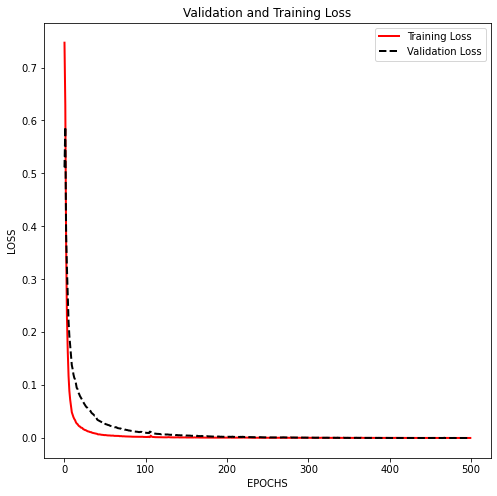

In [114]:
plt.figure(figsize=(8, 8))
plt.plot(range(500),loss,label='Training Loss',linewidth=2.0,color='red')
plt.plot(range(500),val_loss,label='Validation Loss',ls='--',linewidth=2.0,color='black')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title("Validation and Training Loss")

Text(0.5, 1.0, 'Mean Absolute Error For Training and Validation')

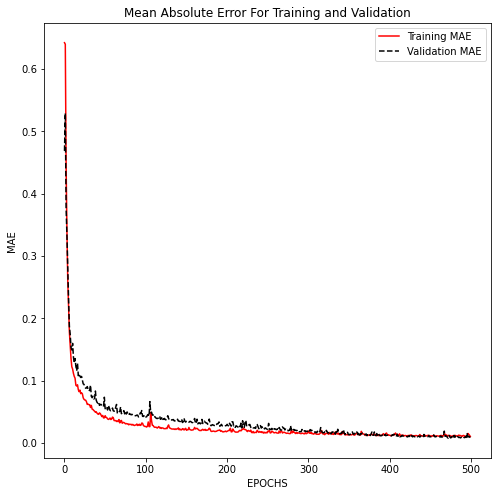

In [116]:
plt.figure(figsize=(8, 8))
plt.plot(range(500),mae,label='Training MAE',color='red')
plt.plot(range(500),val_mae,label='Validation MAE',ls='--',color='black')
plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('MAE')
plt.title("Mean Absolute Error For Training and Validation")

# Train Data

In [130]:
predictions=model.predict(X_train)
convt_predictions=[convert_label_value(x) for x in predictions]
convt_y_train=[convert_label_value(x) for x in y_train]

Text(0, 0.5, 'Prices')

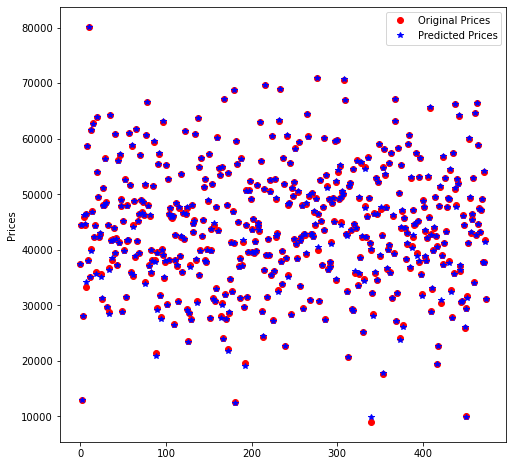

In [131]:
plt.figure(figsize=(8,8))
plt.plot(range(475),convt_y_train,'ro',label='Original Prices')
plt.plot(range(475),convt_predictions,'b*',label='Predicted Prices')
plt.legend()
plt.ylabel("Prices")

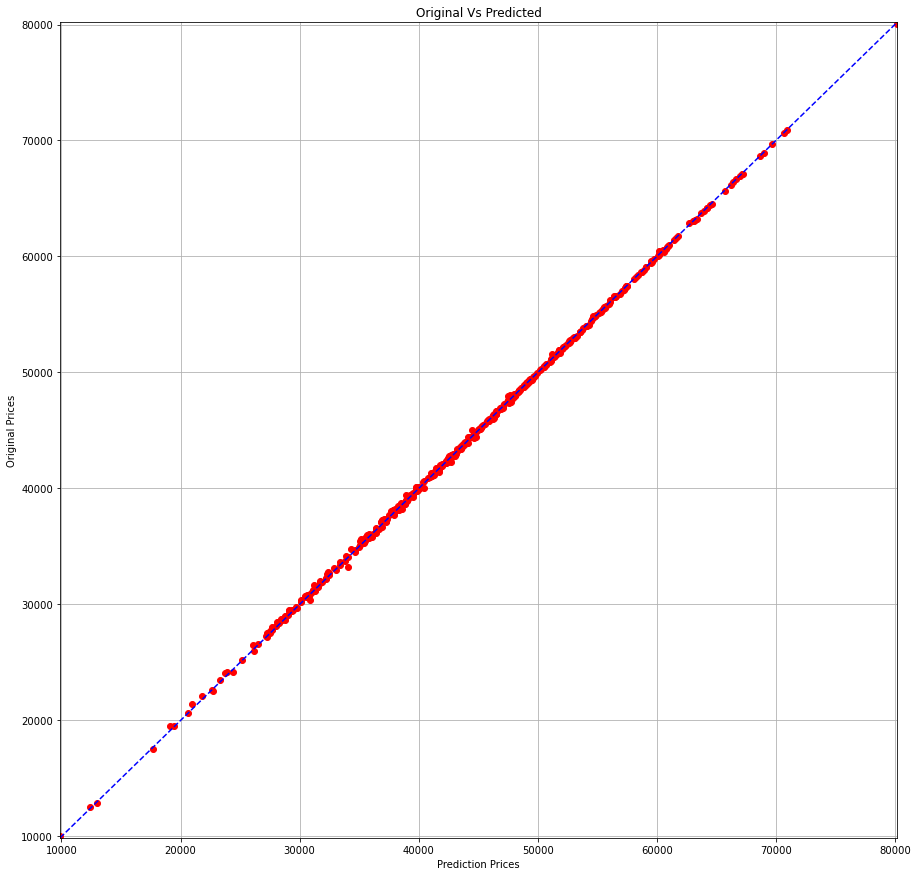

In [133]:
plt.figure(figsize=(15,15))
plt.plot(convt_predictions,convt_y_train,'ro',label='Trained Model')
plt.xlabel('Prediction Prices')
plt.ylabel('Original Prices')
plt.grid()
plt.title('Original Vs Predicted')

y_min = min(min(convt_y_test), min(convt_predictions))
y_max = max(max(convt_y_test), max(convt_predictions))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')

# Test Data

In [127]:
predictions=model.predict(X_test)
convt_predictions=[convert_label_value(x) for x in predictions]
convt_y_test=[convert_label_value(x) for x in y_test]

Text(0, 0.5, 'Prices')

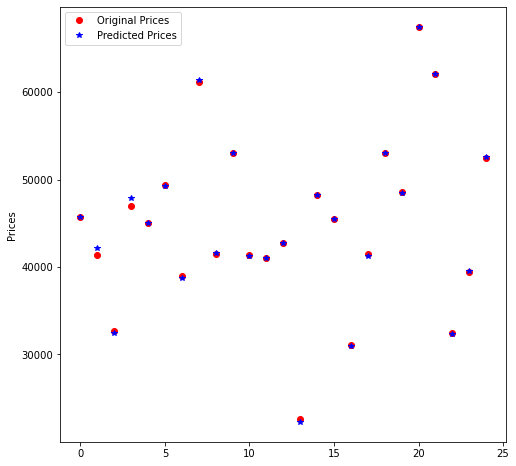

In [128]:
plt.figure(figsize=(8,8))
plt.plot(range(25),convt_y_test,'ro',label='Original Prices')
plt.plot(range(25),convt_predictions,'b*',label='Predicted Prices')
plt.legend()
plt.ylabel("Prices")

In [120]:
h=model.evaluate(X_test,y_test)

25/25 [==============================] - 0s 12ms/sample - loss: 5.9629e-04 - mean_absolute_error: 0.0145


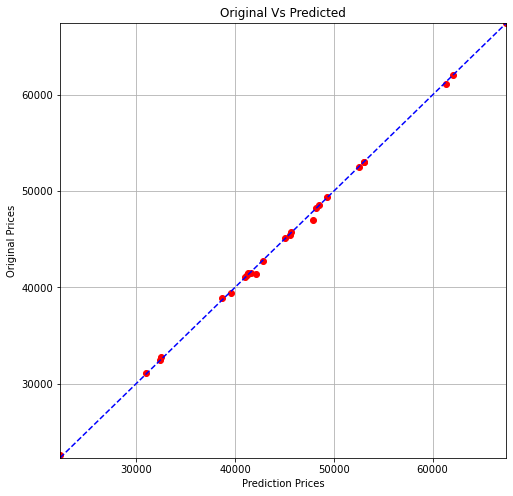

In [121]:
plt.figure(figsize=(8,8))
plt.plot(convt_predictions,convt_y_test,'ro',label='Trained Model')
plt.xlabel('Prediction Prices')
plt.ylabel('Original Prices')
plt.grid()
plt.title('Original Vs Predicted')

y_min = min(min(convt_y_test), min(convt_predictions))
y_max = max(max(convt_y_test), max(convt_predictions))

plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')